In [ ]:
### Curso de Python para Finanças Quantitativas

#### Aula 11 - Regressão Linear e Volatilidade
#### Autor: Leandro Guerra - Outspoken Market
#### Download em: https://www.outspokenmarket.com/pythonfinancasquantitativas.html

Como pré requisito para esta aula, assista o Aulão de Regressão Linear para Leigos
https://www.youtube.com/watch?v=0mFvllux_zQ

____________________________________________________

In [1]:
# Carregando as bibliotecas

import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import statsmodels.api as sm
from statsmodels.formula.api import ols

import yfinance as yf

get_ipython().run_line_magic('matplotlib', 'inline')

[*********************100%***********************]  1 of 1 completed


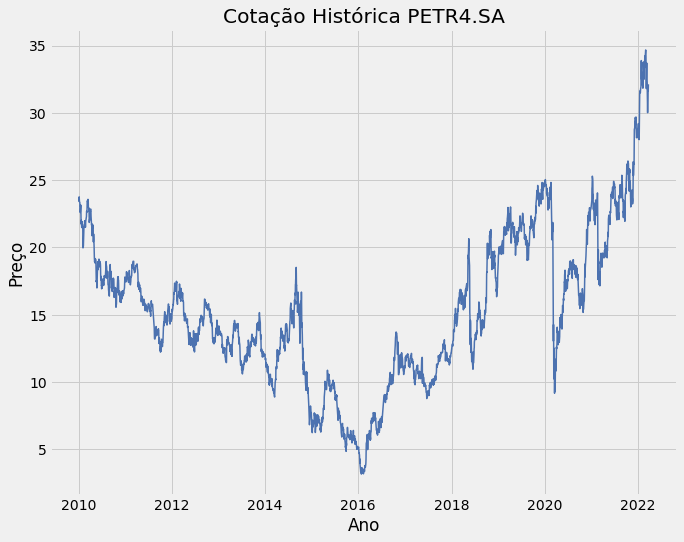

In [2]:
# Carregando a base de dados e fazendo os checks iniciais

plt.style.use("fivethirtyeight")
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

# Carrega a base
ticker = "PETR4.SA"
df1 = yf.download(ticker, "2010-01-01", "2022-12-31")

with plt.style.context("seaborn-deep"):
    plt.figure(figsize = (10, 8))
    plt.plot(df1["Adj Close"], linewidth = 1.5)
    plt.xlabel("Ano")
    plt.ylabel("Preço")
    plt.title("Cotação Histórica " + ticker)

In [3]:
# Cria variáveis: Volatilidade, Distância e Direção e o alvo que será a volatilidade de 5 dias

periodos = 5

df1["Retorno"] = df1["Adj Close"].pct_change(1)

df1["Retorno_p"] = df1["Adj Close"].pct_change(periodos).rolling(10).mean()

# Proporção do corpo do candle em relacão ao range do dia
df1["Prop"] = (df1["Adj Close"]-df1["Open"])/(df1["High"]-df1["Low"])

# Volatilidade de 5 dias
df1["Std"] = df1["Retorno"].rolling(5).std()

# Construção do alvo
# Alvo - Volatilidade
df1["Alvo"] = df1["Std"].shift(-periodos)

In [5]:
df1.head(15)

,Open,High,Low,Close,Adj Close,Volume,Retorno,Retorno_p,Prop,Std,Alvo
Date,,,,,,,,,,,
2010-01-04,36.950001,37.320000,36.820000,37.320000,23.643644,13303600,NaN,NaN,-26.612713,NaN,0.009339
2010-01-05,37.380001,37.430000,36.799999,37.000000,23.440912,21396400,-0.008574,NaN,-22.125500,NaN,0.010159
2010-01-06,36.799999,37.500000,36.799999,37.500000,23.757677,18720600,0.013513,NaN,-18.631868,NaN,0.004543
2010-01-07,37.270000,37.450001,37.070000,37.150002,23.535948,10964600,-0.009333,NaN,-36.142142,NaN,0.006706
2010-01-08,37.160000,37.389999,36.860001,36.950001,23.409237,14624200,-0.005384,NaN,-25.944895,NaN,0.008179
2010-01-11,37.209999,37.340000,36.619999,36.830002,23.333212,15317700,-0.003248,NaN,-19.273283,0.009339,0.015511
2010-01-12,36.590000,36.680000,36.040001,36.360001,23.035446,14886200,-0.012761,NaN,-21.179011,0.010159,0.014415
2010-01-13,36.560001,36.740002,35.840000,36.299999,22.997425,23228200,-0.001651,NaN,-15.069504,0.004543,0.018553
2010-01-14,36.279999,36.459999,35.560001,35.669998,22.598303,20073400,-0.017355,NaN,-15.201923,0.006706,0.021809


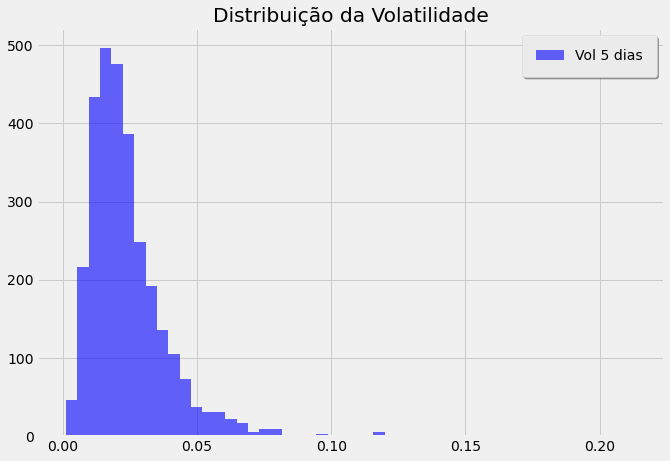

In [6]:
# Histograma

config = dict(histtype = "stepfilled", alpha = 0.6, density = False, bins = 50)

plt.figure(figsize = (10,7))
plt.hist(df1["Alvo"], **config, label = "Vol 5 dias", color = "blue")

# Formatação da legenda - Válida para qualquer tipo de gráfico
plt.legend(loc = "upper right"
           , frameon = True
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)
plt.title("Distribuição da Volatilidade");


____________________________________________________

### Analisando as correlações

In [7]:
# Analisando a correlação das variáveis com o nosso alvo

correl = df1.corr()["Alvo"].drop(["Open","High", "Low", "Close", "Adj Close", "Alvo"])

correl

Volume       0.343816
Retorno     -0.120339
Retorno_p   -0.155522
Prop         0.309955
Std          0.476462
Name: Alvo, dtype: float64

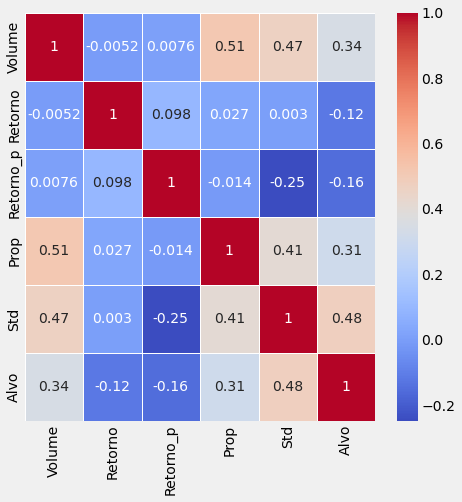

In [9]:
# Visualizando as correlações - Geralmemte heat maps são o melhor tipo de visualização

correl_hm = df1.drop(["Open","High", "Low", "Close", "Adj Close"], axis = 1).corr()

fig, ax = plt.subplots(figsize = (7, 7))

sns.heatmap(correl_hm, cmap = "coolwarm", annot = True, linewidths = 0.6, ax = ax);

In [10]:
df1.drop(["Open","High", "Low", "Close", "Adj Close"], axis = 1).describe()

,Volume,Retorno,Retorno_p,Prop,Std,Alvo
count,3.009000e+03,3008.000000,2995.000000,3009.000000,3004.000000,3004.000000
mean,4.796259e+07,0.000537,0.002657,-inf,0.024409,0.024409
std,3.519509e+07,0.029327,0.043678,NaN,0.016547,0.016547
min,0.000000e+00,-0.296978,-0.294226,-inf,0.001129,0.001129
25%,2.481050e+07,-0.014376,-0.020056,-13.685229,0.014221,0.014221
50%,4.116850e+07,0.000361,0.003030,-8.915631,0.020785,0.020785
75%,6.191030e+07,0.014670,0.025520,-5.625370,0.029547,0.029547
max,6.989506e+08,0.222222,0.260169,0.860294,0.213265,0.213265


____________________________________________________

### Treinamento e teste da regressao linear com Statsmodels

In [11]:
# Filtrando os valores missing

df1.replace([np.inf, -np.inf], np.nan, inplace = True)
df1_filtrado = df1.dropna(axis = 0) 

df1_filtrado.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Retorno',
       'Retorno_p', 'Prop', 'Std', 'Alvo'],
      dtype='object')

In [13]:
# Separando os dados entre treinamento e teste

# Vamos treinar o modelo de 2010 a 2015
start_train = "2010-01-01"
end_train = "2015-12-31"

# Vamos testar o modelo de 2016 a 2022
start_test = "2016-01-01"
end_test = "2022-12-31"

df1_train = df1_filtrado.loc[start_train : end_train]

df1_test = df1_filtrado.loc[start_test : end_test]

# Separando os dados com as variaveis em x e o alvo em y
 
x_train = df1_train.iloc[:, 5:10]
y_train = df1_train["Alvo"]

x_test = df1_test.iloc[:, 5:10]
y_test = df1_test["Alvo"]

In [14]:
# Treinando o modelo com statsmodels

# Nota importante: por padrão o statsmodels não acrescenta o intercepto
# você deve acrescentá-lo manualmente

x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

lr_sm = sm.OLS(y_train, x_train_).fit() # Linha que treina o modelo

y_pred_train = lr_sm.predict(x_train_)

y_pred_test = lr_sm.predict(x_test_)

# Mostra as estatísticas 
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Alvo   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           4.86e-99
Time:                        20:58:54   Log-Likelihood:                 4352.8
No. Observations:                1416   AIC:                            -8694.
Df Residuals:                    1410   BIC:                            -8662.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0176      0.001     16.196      0.000       0.015       0.020
Volume      7.649e-11   1.15e-11      6.638      0.000    5.39e-11    9.91e-11
Retorno       -0.0241      0.011     -2.155      0.031      -0.046      -0.002
Retorno_p     -0.0322      0.008     -3.947      0.000      -0.048      -0.016
Prop           0.0003   4.49e-05      6.884      0.000       0.000       0.000
Std            0.2796      0.028     10.136      0.000       0.225       0.334
==============================================================================
Omnibus:                      273.730   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              610.567
Skew:                           1.080   Prob(JB):                    2.61e-133
Kurtosis:                       5.385   Cond. No.                     4.19e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

____________________________________________________

### Visualização dos resultados

In [15]:
# Resultados: Real x previsto em um dataframe

resultados = pd.DataFrame({'Real': y_test, 'Previsto': y_pred_test})

# Isto será usado para simular a medição da acurácia do modelo
resultados["Real_lag"] = resultados["Real"].shift(1)
resultados["Previsto_lag"] = resultados["Previsto"].shift(1)
resultados["Real_dir"] = np.where(resultados["Real"] > resultados["Real_lag"], 1, 0)
resultados["Previsto_dir"] = np.where(resultados["Previsto"] > resultados["Previsto_lag"], 1, 0)
resultados["Real_cat"] = np.where(resultados["Real"] > 0.024408, 1, 0)
resultados["Previsto_cat"] = np.where(resultados["Previsto"] > 0.024408, 1, 0)

resultados

,Real,Previsto,Real_lag,Previsto_lag,Real_dir,Previsto_dir,Real_cat,Previsto_cat
Date,,,,,,,,
2016-01-04,0.015936,0.027451,NaN,NaN,0,0,0,1
2016-01-05,0.034751,0.026974,0.015936,0.027451,1,0,1,1
2016-01-06,0.035021,0.028755,0.034751,0.026974,1,1,1,1
2016-01-07,0.063937,0.030110,0.035021,0.028755,1,1,1,1
2016-01-08,0.070283,0.028798,0.063937,0.030110,1,0,1,1
...,...,...,...,...,...,...,...,...
2022-03-10,0.010014,0.038931,0.027296,0.034010,0,1,0,1
2022-03-11,0.019008,0.037902,0.010014,0.038931,1,0,0,1
2022-03-14,0.028183,0.030477,0.019008,0.037902,1,0,1,1


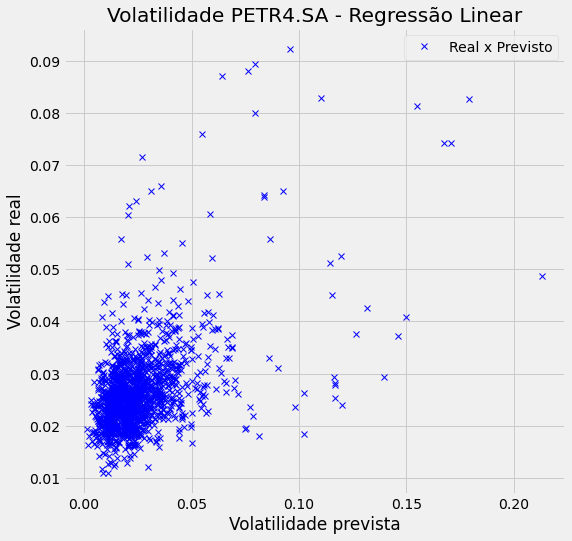

In [16]:
# Gráfico dos resultados

plt.figure(figsize = (8, 8))
plt.plot(y_test, y_pred_test, "x", color = "blue", label = "Real x Previsto")
plt.legend()
plt.xlabel("Volatilidade prevista")
plt.ylabel("Volatilidade real")
plt.title("Volatilidade " + ticker + " - Regressão Linear");

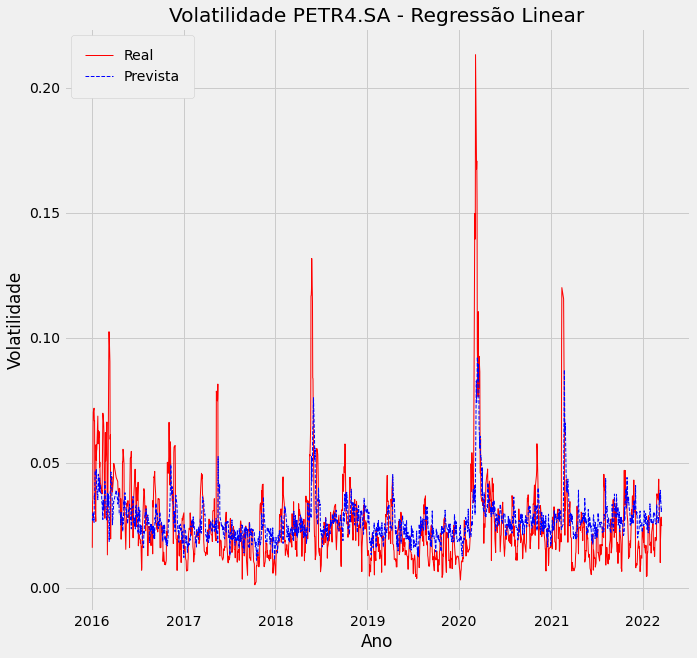

In [17]:
with plt.style.context("seaborn-deep"):
    plt.figure(figsize = (10, 10))
    plt.plot(resultados["Real"], linewidth = 1, label = "Real", c = "red")
    plt.plot(resultados["Previsto"], "--", linewidth = 1, label = "Prevista", c = "blue")
    plt.xlabel("Ano")
    plt.ylabel("Volatilidade")
    plt.legend(loc = "upper left"
           , frameon = True
           , fancybox = True
           , framealpha = 1
           , borderpad = 1)
    plt.title("Volatilidade " + ticker + " - Regressão Linear")

### Métricas de avaliação: MAE, R2 e RMSE

In [20]:
# Avaliaçao dos resultados com statsmodels

MAE_train_sm = sm.tools.eval_measures.meanabs(y_train, y_pred_train)
R2_train_sm = lr_sm.rsquared # Coeficiente de determinaçao
RMSE_train_sm = sm.tools.eval_measures.rmse(y_train, y_pred_train)

print("----- Avaliação do treinamento -----")
print("MAE: ", round(MAE_train_sm, 3))
print('R2: ', round(R2_train_sm, 3))
print('RMSE: ', round(RMSE_train_sm, 3))

MAE_test_sm = sm.tools.eval_measures.meanabs(y_test, y_pred_test) 
RMSE_test_sm = sm.tools.eval_measures.rmse(y_test, y_pred_test)

print("")
print("----- Avaliação do teste -----")
print("MAE: ", round(MAE_test_sm, 3))
print('RMSE: ', round(RMSE_test_sm, 3))


----- Avaliação do treinamento -----
MAE:  0.008
R2:  0.282
RMSE:  0.011

----- Avaliação do teste -----
MAE:  0.011
RMSE:  0.017


In [22]:
# Olhando apenas para a base de teste

print("A volatilidade média da base é: ")
print(round(y_test.mean(), 3))
print()
print("O percentual do MAE em relaçao à média da base: ")
print(round(metrics.mean_absolute_error(y_test, y_pred_test)/y_test.mean()*100, 2))

A volatilidade média da base é: 
0.026

O percentual do MAE em relaçao à média da base: 
41.37


In [23]:
# Porém...

round(pd.crosstab(resultados.Previsto_dir, resultados.Real_dir
            ,  normalize = True)*100, 2)

Real_dir,0,1
Previsto_dir,,
0,21.88,32.00
1,28.78,17.35


In [26]:
# Porém 2...muito melhor - soma a diagnoal principal

round(pd.crosstab(resultados.Previsto_cat, resultados.Real_cat
            , normalize = True)*100, 2)

Real_cat,0,1
Previsto_cat,,
0,32.98,9.66
1,27.33,30.03


In [28]:
# Mostrando os coeficientes (pesos) da regressao

print(lr_sm.params)

const        1.761499e-02
Volume       7.649406e-11
Retorno     -2.411297e-02
Retorno_p   -3.217544e-02
Prop         3.089781e-04
Std          2.796144e-01
dtype: float64


### A formula da sua regressão é

lr = 1.761499e-02 + volume*7.649406e-11 - 2.411297e-02*retorno e assim por diante

____________________________________________________

### Diagnostico da regressão

In [29]:
lr_sm.resid 

Date
2010-01-22   -0.005207
2010-01-26   -0.009366
2010-01-27   -0.010523
2010-01-28    0.001182
2010-01-29    0.001118
                ...   
2015-12-22   -0.003211
2015-12-23   -0.003511
2015-12-28   -0.002727
2015-12-29   -0.000698
2015-12-30    0.001174
Length: 1416, dtype: float64

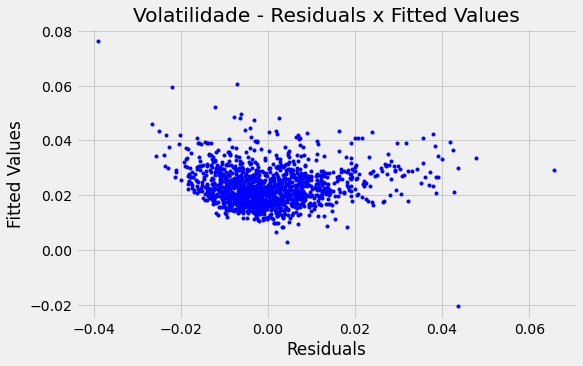

In [30]:
# Residuals x Fitted Values

plt.figure(figsize = (8, 5))
plt.plot(lr_sm.resid, y_pred_train, ".", color = "blue")
plt.xlabel("Residuals")
plt.ylabel("Fitted Values")
plt.title("Volatilidade - Residuals x Fitted Values");

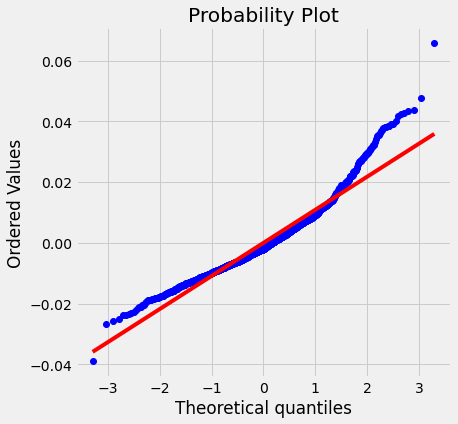

In [31]:
# Normality plot

import scipy as sp

fig, ax = plt.subplots(figsize = (6 , 6))

sp.stats.probplot(lr_sm.resid, plot = ax, fit = True);

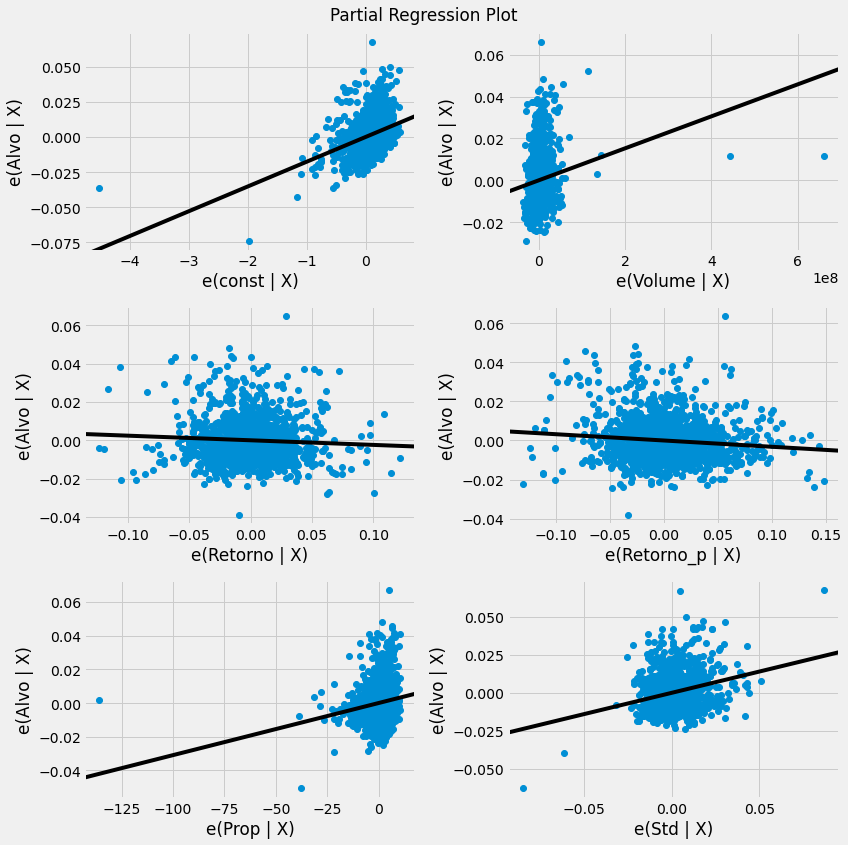

In [32]:
import statsmodels.api as sm

fig = plt.figure(figsize = (12, 12))

fig = sm.graphics.plot_partregress_grid(lr_sm, fig = fig)

In [37]:
# Fazendo a previsão de um único registro

lr_sm.predict([[7, 0.010, 0.002, 0.076, 10.0, 0.012]])

array([0.12725651])

In [33]:
df1_filtrado.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Retorno',
       'Retorno_p', 'Prop', 'Std', 'Alvo'],
      dtype='object')

____________________________________________________